Found 800 images belonging to 8 classes.
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1358 - loss: 2.6563
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.1585 - loss: 2.0653
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1995 - loss: 2.0089
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.2931 - loss: 1.8979
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 806ms/step - accuracy: 0.3294 - loss: 1.8229
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


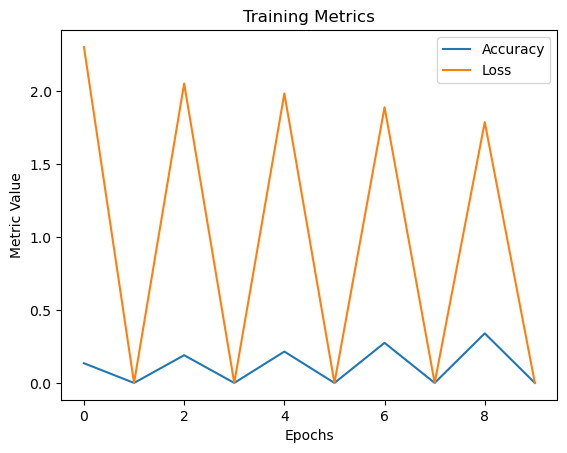

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


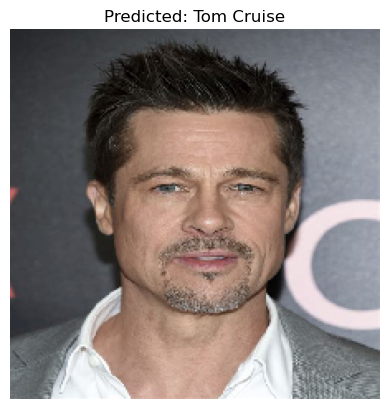

Celebrity identified: Tom Cruise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


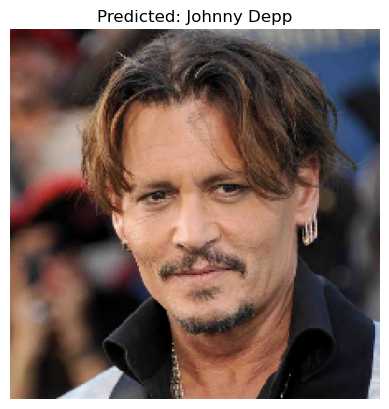

Celebrity identified: Johnny Depp


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Step 1: Prepare the dataset
dataset_folder = r"Face_recognition/Face_recognition/Celebrity Faces Dataset"  # Folder containing celebrity subfolders
img_height, img_width = 224, 224  # Resize images to 224x224 pixels

if not os.path.exists(dataset_folder):
    raise FileNotFoundError(f"The dataset folder '{dataset_folder}' does not exist.")

# Image augmentation and data loading
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_folder,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',  # Use categorical classification for multi-class problem
)

# Step 2: Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer for classification
])

# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10
)

# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title("Training Metrics")
plt.xlabel("Epochs")
plt.ylabel("Metric Value")
plt.legend()
plt.show()

# Step 5: Predict the celebrity in a test image
def predict_celebrity(test_image_path):
    if not os.path.exists(test_image_path):
        print(f"Test image '{test_image_path}' not found.")
        return
    
    # Load and preprocess the test image
    img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Make the image batch size 1
    img_array = img_array / 255.0  # Normalize the image
    
    # Predict the test image
    predictions = model.predict(img_array)
    
    # Get the predicted class
    predicted_class = predictions.argmax()  # Index of the highest probability
    class_labels = list(train_generator.class_indices.keys())  # Class names from the generator
    celebrity_name = class_labels[predicted_class]
    
    # Display the image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {celebrity_name}")
    plt.axis('off')
    plt.show()
    print(f"Celebrity identified: {celebrity_name}")

# Example usage:
test_image_path = r"Face1.jpg"
predict_celebrity(test_image_path)

test_image_path = r"Face 2.jpg"
predict_celebrity(test_image_path)